<a href="https://colab.research.google.com/github/amandatz/computational-linear-algebra/blob/main/Atividade6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 6

Amanda Topanotti Zanette (22100776)

**Importações e funções auxiliares**

In [1]:
using LinearAlgebra, SparseArrays, Plots


Esse trecho de código é usado apenas para garantir a repetibilidade dos números aleatórios gerados.

In [2]:
using Random
Random.seed!(123)

TaskLocalRNG()

### Questão 1

In [11]:
function gauss_seidel(A, b, x0; tol=1e-8, max_iter=1000)
  n = length(b)
  x = copy(x0)

  residuals = Float64[]
  residual = norm(A * x - b)
  push!(residuals, residual)

  for iter in 1:max_iter
    x_old = copy(x)

    for i in 1:n
      sum_upd = dot(A[i, 1:i-1], x[1:i-1])
      sum_n_upd = dot(A[i, i+1:n], x_old[i+1:n])

      x[i] = (b[i] - sum_upd - sum_n_upd) / A[i, i]
    end

    residual = norm(A * x - b)
    push!(residuals, residual)

    if residual < tol
      return x, residuals, iter
    end
  end

  return x, residuals, max_iter
end

gauss_seidel (generic function with 1 method)

In [20]:
function gradiente_conjugado(A, b, x0; tol=1e-8, max_iter=1000)
  x = copy(x0)
  r = b - A * x
  p = copy(r)
  rsold = dot(r, r)
  residuals = [sqrt(rsold)]

  for iter in 1:max_iter
    Ap = A * p
    alpha = rsold / dot(p, Ap)

    x .+= alpha .* p
    r .-= alpha .* Ap

    rsnew = dot(r, r)
    push!(residuals, sqrt(rsnew))

    if sqrt(rsnew) < tol
      return x, residuals, iter
    end

    beta = rsnew / rsold
    p .= r .+ beta .* p
    rsold = rsnew
  end

  return x, residuals, max_iter
end

gradiente_conjugado (generic function with 1 method)

### Questão 2

In [28]:
function matriz_bloco_tridiagonal(m, n)
    T = spdiagm(-1 => fill(-1.0, n-1),
                 0 => fill(4.0, n),
                 1 => fill(-1.0, n-1))

    A = blockdiag([T for _ in 1:m]...)

    I_bloco = spdiagm(0 => fill(-1.0, n))
    for k in 1:m-1
        rows = (k-1)*n+1:k*n
        cols = k*n+1:(k+1)*n
        A[rows, cols] = I_bloco
        A[cols, rows] = I_bloco
    end
    return A
end

matriz_bloco_tridiagonal (generic function with 2 methods)

In [46]:
function testar_sistemas(m, n)
    println("\n========================================")
    println("Resolvendo para m = $m, n = $n")
    println("Tamanho da matriz: $(m*n)×$(m*n)")
    println("========================================")

    @time begin
      A = matriz_bloco_tridiagonal(m, n)
      e = ones(m*n)
      b = A*e
      x0 = zeros(m*n)

      println("\n ===== Gradiente Conjugado =====")
      x_gc, res_gc, iter_gc = gradiente_conjugado(A, b, x0)

      println("\n Solução encontrada (x):")
      println(x_gc)
      println("\nNúmero de iterações: ", iter_gc)
      println("Resíduo final:       ", res_gc)

      println("\n ===== Gauss-Seidel =====")
      x_gs, res_gs, iter_gs = gauss_seidel(A, b, x0)

      println("\n Solução encontrada (x):")
      println(x_gs)
      println("\nNúmero de iterações: ", iter_gs)
      println("Resíduo final:       ", res_gs)

      # Plotagem
      p = plot(title="Comparação para n=$n (Tamanho $(m*n)×$(m*n))",
               xlabel="Iterações", ylabel="‖r‖₂ (log)",
               yscale=:log10, legend=:topright)

      plot!(p, res_gc, label="Grad. Conjugado ($iter_gc iter)", lw=2)
      plot!(p, res_gs, label="Gauss-Seidel ($iter_gs iter)", lw=2)

      display(p)
  end
end

testar_sistemas (generic function with 1 method)

Como é possível verificar a seguir, para todos os $n=10,100,1000$, o método do Gradiente Conjugado é mais eficaz que o de Gauss-Seidel.


Resolvendo para m = 10, n = 10
Tamanho da matriz: 100×100

 ===== Gradiente Conjugado =====

 Solução encontrada (x):
[1.0000000000000002, 1.0, 0.9999999999999999, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0, 0.9999999999999997, 1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0000000000000002, 0.9999999999999999, 1.0, 0.9999999999999997, 0.9999999999999999, 1.0000000000000002, 0.9999999999999998, 0.9999999999999999, 1.0, 0.9999999999999998, 0.9999999999999997, 0.9999999999999999, 0.9999999999999997, 0.9999999999999998, 1.0, 0.9999999999999998, 0.9999999999999998, 0.9999999999999997, 0.9999999999999997, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0000000000000002, 0.9999999999999998, 0.9999999999999999, 0.9999999999999997, 0.9999999999999996, 0.9999999999999996, 0.9999999999999994, 1.0, 0.9999999999999998, 1.0, 1.0, 0.9999999999999996, 0.9999999999999999, 0.9999999999999997, 0.9999999999999996, 0.999

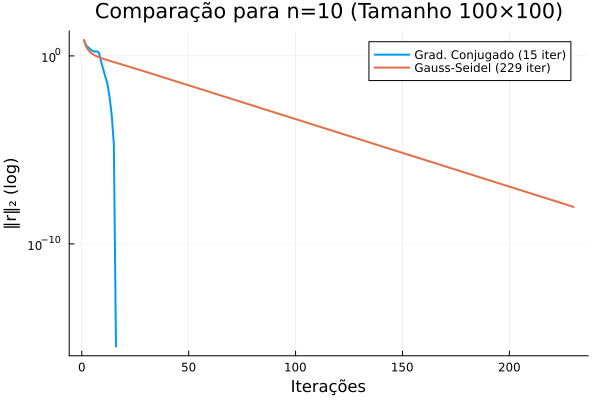

  0.115986 seconds (257.76 k allocations: 36.210 MiB)


In [47]:
A1 = testar_sistemas(10, 10)


Resolvendo para m = 10, n = 100
Tamanho da matriz: 1000×1000

 ===== Gradiente Conjugado =====

 Solução encontrada (x):
[0.999999999972955, 0.9999999999761676, 0.999999999977693, 0.9999999999853785, 1.0000000000206684, 1.0000000000357732, 1.0000000000250955, 0.9999999999848735, 0.9999999999685315, 0.9999999999501661, 0.9999999999644447, 0.999999999953305, 0.9999999999688293, 0.9999999999487911, 0.9999999999648188, 0.9999999998631418, 0.9999999998475101, 0.9999999998003233, 0.999999999912728, 0.9999999999048218, 1.0000000000217746, 1.0000000000394587, 1.0000000001018718, 1.0000000001487386, 1.000000000196141, 1.0000000002526366, 1.0000000001860396, 1.0000000002065788, 1.000000000057967, 1.0000000000004323, 0.9999999999132128, 0.9999999998758765, 0.9999999999253024, 0.9999999999279853, 0.9999999999626263, 0.9999999999870501, 1.0000000000775342, 1.0000000000570344, 1.0000000000636686, 1.000000000076264, 1.0000000000042928, 1.000000000139364, 1.0000000000682934, 0.9999999997673191, 0.999

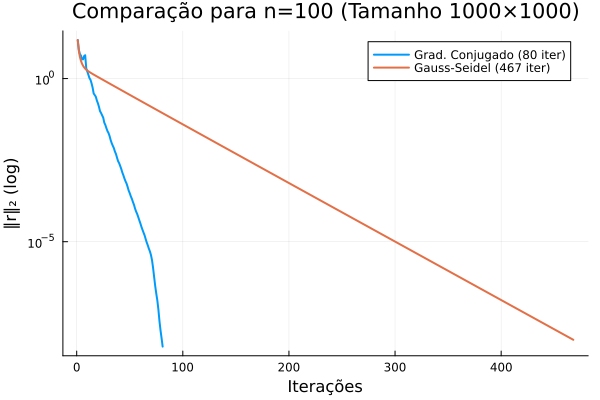

  3.335543 seconds (4.76 M allocations: 3.868 GiB, 6.19% gc time)


In [48]:
A2 = testar_sistemas(10, 100)

In [ ]:
A3 = testar_sistemas(10, 1000)


Resolvendo para m = 10, n = 1000
Tamanho da matriz: 10000×10000

 ===== Gradiente Conjugado =====

 Solução encontrada (x):
[0.999999999982251, 1.0000000000154754, 1.0000000000231832, 1.0000000000231897, 1.0000000000025908, 0.9999999999930855, 0.9999999999985559, 1.000000000019207, 1.000000000039737, 1.0000000000665548, 1.0000000000939728, 1.0000000000942904, 1.0000000000588554, 1.0000000000589746, 1.0000000001040876, 1.000000000107645, 1.0000000001649898, 1.0000000001156657, 1.0000000001212546, 1.000000000042308, 1.0000000000116935, 0.9999999999540834, 0.9999999999254541, 0.9999999998541688, 0.9999999998216023, 0.9999999998410015, 0.9999999998356158, 0.9999999998798709, 0.9999999998765118, 0.999999999995309, 1.0000000000154607, 1.0000000001304956, 1.0000000001800722, 1.0000000001213825, 1.000000000170889, 1.0000000000149611, 0.9999999999300333, 0.9999999999552884, 0.9999999999469991, 0.9999999999793306, 0.9999999999911592, 0.9999999999469894, 0.9999999999394145, 1.0000000000034668, 0

### Questão 3

In [8]:
function gerar_matriz_espectral(autovalores::Vector{Float64})
    n = length(autovalores)
    # Passo 1: Gerar matriz aleatória e sua decomposição QR
    M = randn(n, n)
    Q, _ = qr(M)  # Q é ortogonal

    # Passo 2: Construir a matriz simétrica usando autovalores
    # Aqui evitamos criar a matriz diagonal explicitamente
    A = zeros(n, n)
    for i in 1:n
        λ = autovalores[i]
        q = Q[:, i]
        A .+= λ * (q * q')  # Rank-1 update
    end
    return Symmetric(A)
end

gerar_matriz_espectral (generic function with 1 method)

In [10]:
using LinearAlgebra

# 1. Gerar matrizes especiais (sem usar diagonal)
function criar_matriz(autovalores)
    n = length(autovalores)
    Q = randn(n, n) |> qr |> x -> x.Q  # Matriz aleatória ortogonal
    return Q * Diagonal(autovalores) * Q'  # Monta a matriz simétrica
end

# 2. Criar os 3 casos pedidos
autovalores_a = range(1, 1000, length=1000)  # Uniforme 1 a 1000
autovalores_b = repeat(100:100:1000, inner=100)  # 100,200,...,1000 (cada 100x)
autovalores_c = repeat([1, 100000], inner=500)   # 1 e 100000 (cada 500x)

A1 = criar_matriz(autovalores_a)
A2 = criar_matriz(autovalores_b)
A3 = criar_matriz(autovalores_c)

# 3. Gradiente Conjugado simples
function GC(A, b, x0; max_iter=1000, tol=1e-8)
    x = copy(x0)
    r = b - A*x
    p = copy(r)
    for iter in 1:max_iter
        α = dot(r, r) / dot(p, A*p)
        x += α * p
        r_novo = r - α * A*p
        if norm(r_novo) < tol
            return x, iter
        end
        β = dot(r_novo, r_novo) / dot(r, r)
        p = r_novo + β * p
        r = r_novo
    end
    return x, max_iter
end

# 4. Testar com b = A*e (e = vetor de 1s)
e = ones(1000)
x0 = zeros(1000)

# Teste para A1
b1 = A1 * e
x1, iter1 = GC(A1, b1, x0)
println("Caso A1 (uniforme): convergiu em $iter1 iterações")

# Teste para A2
b2 = A2 * e
x2, iter2 = GC(A2, b2, x0)
println("Caso A2 (escalonado): convergiu em $iter2 iterações")

# Teste para A3
b3 = A3 * e
x3, iter3 = GC(A3, b3, x0)
println("Caso A3 (extremos): convergiu em $iter3 iterações")

Caso A1 (uniforme): convergiu em 209 iterações
Caso A2 (escalonado): convergiu em 10 iterações
Caso A3 (extremos): convergiu em 3 iterações
